In [1]:
%load_ext autoreload
%autoreload 2

# Experiments with EASE model

In [2]:
from pathlib import Path

import teaser.util as util
import teaser.evaluation as evaluation

from teaser.algorithm.baseline.ease import EASE

## Datasets

In [3]:
## Uncomment corresponding directory.
# DATA_DIR = Path('../../data/Publiq/')
DATA_DIR = Path('../../data/ML20M/')

In [4]:
# Shouldn't need to change this info
INTERACTIONS_TRAIN_PATH = DATA_DIR / 'interactions.train.csv'
INTERACTIONS_VALIN_PATH = DATA_DIR / 'interactions.valin.csv'
INTERACTIONS_VALOUT_PATH = DATA_DIR / 'interactions.valout.csv'
INTERACTIONS_TESTIN_PATH = DATA_DIR / 'interactions.testin.csv'
INTERACTIONS_TESTOUT_PATH = DATA_DIR / 'interactions.testout.csv'

METADATA_PATH = DATA_DIR / 'features.csv'

ITEM_ID = 'itemId'
USER_ID = 'userId'

## Define algorithm and hyperparameter ranges

In [5]:
ALG = EASE

L2 = [10 ** p for p in range(1, 6)]
HYPERPARAMS = {'l2': L2}
HYPERPARAMS

{'l2': [10, 100, 1000, 10000, 100000]}

## Parse data

In [6]:
S, tags = util.parse_metadata(METADATA_PATH, item_id=ITEM_ID)
n, t = S.shape  # amount of items and tags
del S, tags

X = util.parse_interactions(INTERACTIONS_TRAIN_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)

Xval_in = util.parse_interactions(INTERACTIONS_VALIN_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)
Xval_out = util.parse_interactions(INTERACTIONS_VALOUT_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)
Xtest_in = util.parse_interactions(INTERACTIONS_TESTIN_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)
Xtest_out = util.parse_interactions(INTERACTIONS_TESTOUT_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)

## Perform gridsearch on validation set

In [7]:
score, best_hyperparams = evaluation.gridsearch(ALG, X, None, Xval_in, Xval_out, HYPERPARAMS)
f"Best score of {score} achieved with {best_hyperparams}."

Training model EASE with hyperparameters {'l2': 10}
Evaluating with 10000 users
Average Recall@20 0.38587
Average Recall@100 0.61303
Average nDCG@100 0.40831
Training model EASE with hyperparameters {'l2': 100}
Evaluating with 10000 users
Average Recall@20 0.39545
Average Recall@100 0.62883
Average nDCG@100 0.41905
Training model EASE with hyperparameters {'l2': 1000}
Evaluating with 10000 users
Average Recall@20 0.39726
Average Recall@100 0.63889
Average nDCG@100 0.42287
Training model EASE with hyperparameters {'l2': 10000}
Evaluating with 10000 users
Average Recall@20 0.37886
Average Recall@100 0.62324
Average nDCG@100 0.40719
Training model EASE with hyperparameters {'l2': 100000}
Evaluating with 10000 users
Average Recall@20 0.32218
Average Recall@100 0.5579
Average nDCG@100 0.35339



"Best score of 0.42286936864828756 achieved with {'l2': 1000}."

## Evaluate model with optimal hyperparams on test set

In [8]:
%%time
alg = ALG(**best_hyperparams)
alg = alg.fit(X)

CPU times: user 1h 18min 18s, sys: 2min 28s, total: 1h 20min 46s
Wall time: 3min 12s


In [9]:
print("Performance on test set")
score = evaluation.eval(alg, Xtest_in, Xtest_out)

Performance on test set
Evaluating with 10000 users
Average Recall@20 0.39384
Average Recall@100 0.63928
Average nDCG@100 0.4214


## Plot amount of items from long tail recommended

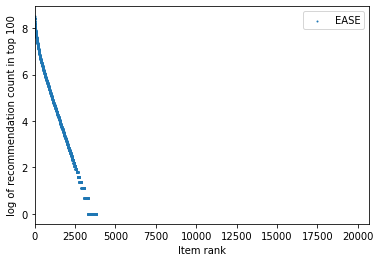

In [10]:
# evaluation.plot_long_tail(alg, Xtest_in=Xtest_in, Xtest_out=Xtest_out, labels=["EASE", "Test items"], k=100)
evaluation.plot_long_tail(alg, histories=Xtest_in, labels=["EASE"], k=100)